0.8
0.7219051445681159
0.6495521558591254
0.5849554686681986
0.5289716263631368
0.48153515884108966
0.4419901824457444
0.4093892369514276
0.38270584530087026
0.36096022843594494
0.3432798754780047
0.32891913968326275
0.3172565456090508
0.30778187645071914
0.30007992313525617
0.2938143912207651
0.28871349027674303
0.28455768311164575
0.2811695678357495
0.2784056563584178
0.27614975245889073
0.27430764072823566
0.27280283284392187
0.27157315960641387
0.27056803700712634
0.26974626901622567
0.2690742781311481
0.26852467748648
0.26807511634464465
0.26770734495653725
0.26740645589860373
0.2671602677197499
0.2669588235970657
0.2667939831178783
0.2666590895978032
0.26654869875732357
0.26645835730319467
0.2663844221423546
0.26632391270856104
0.2662743902939669
0.26623385941828603
0.26620068719129314
0.26617353737294175
0.26615131644333406
0.266133129489185
0.26611824411594914
0.2661060609227944
0.2660960893451134
0.2660879278875632
0.26608124794885746
0.2660757805851284
0.2660713056776374
0.26

<function matplotlib.pyplot.show(close=None, block=None)>

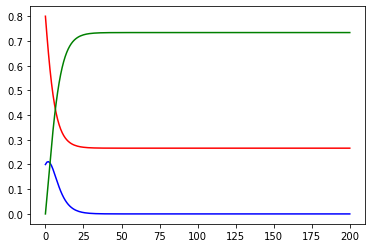

In [6]:
#trying 4th order Runge-Kutta method for SIR model
#author: Elaine Gorom

#create function for susceptible ode
def dsdt(t,s,i):
    return(-beta*s*i)

#create function for infected ode
def didt(t,s,i):
    return(beta*s*i-gamma*i)

#omitting function for recovered ode since it's not necessary to solve this system of odes

#creating main function for 4th order Runge-Kutta for SIR model
def RK4SIR(n,beta, gamma,s0,i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
   

    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ii=I[i]
        print(Si)

        sk1=dsdt(i,Si,Ii)
        ik1=didt(i,Si,Ii)
        

        sk2=dsdt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
        ik2=didt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

        sk3=dsdt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
        ik3=didt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

        sk4=dsdt(i+dt,Si+dt*sk3,Ii+dt*ik3)
        ik4=didt(i+dt,Si+dt*sk3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]

    return S,I,R

n=200
beta=0.5
gamma=1/3
s0=.8
i0=.2
r0=0
dt=1

s,i,r=RK4SIR(n,beta,gamma,s0,i0,r0,dt)

import numpy as np
import math
import matplotlib.pyplot as plt

t=list(range(0,n+1))
plt.figure
plt.plot(t,s,'r')
plt.plot(t,i,'b')
plt.plot(t,r,'g')
plt.show


    
